# Prédire la valeur d'un bien immobilier en utilisant la régression linéaire simple. Exemple du Boston Housing Dataset

In [2]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [3]:
# Chargement des données du Boston Housing Dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
# Afficher la description des données
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Ajout de la colonne MEDV
boston['MEDV'] = boston_dataset.target

In [7]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# check des NaN
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

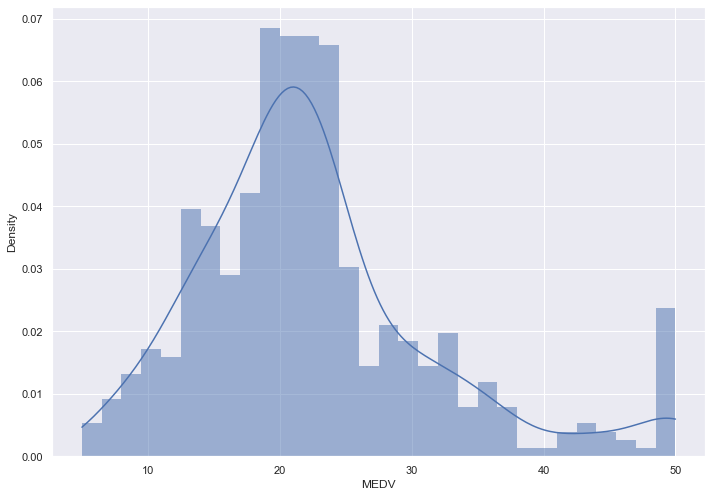

In [9]:
# Check de la distribution de MEDV
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(boston['MEDV'], bins=30, kde=True, stat="density", linewidth=0, color='b')
plt.show()

<AxesSubplot:>

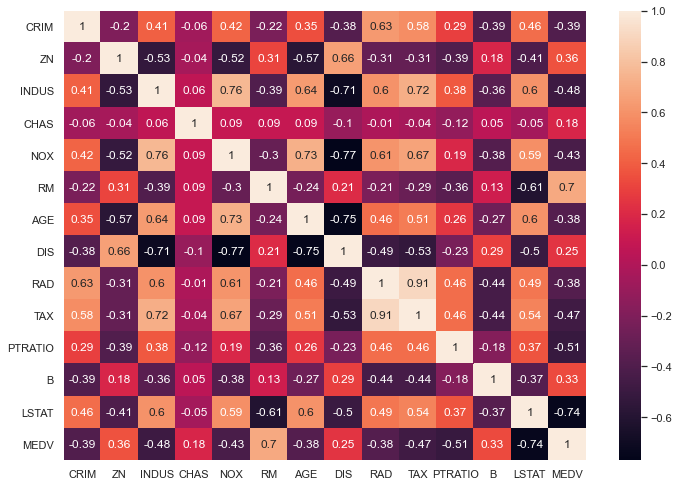

In [9]:
# Check des indices de corrélation entre les différentes variable grace à une heatmap(1 = high correlation and -1 = negative correlation)
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Text(0, 0.5, 'Prix des maisons en $1000')

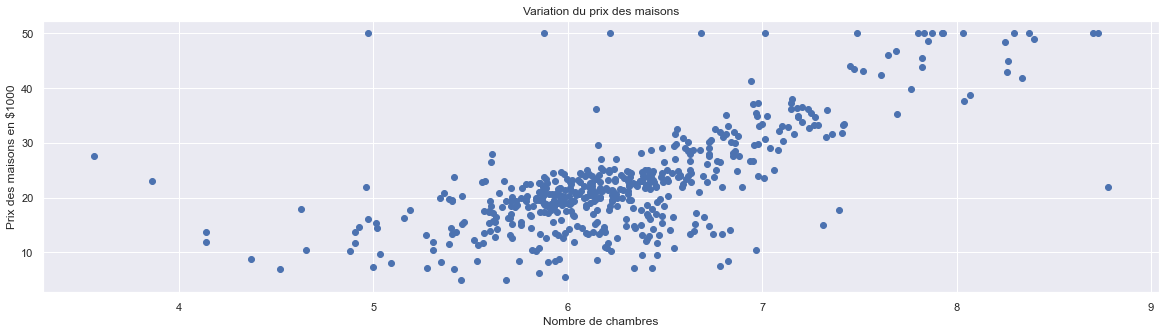

In [10]:
# utilisation d'un scatterplot pour voir comment RM evolue avec MEDV
plt.figure(figsize=(20, 5))

feature = boston['RM']
target = boston['MEDV']

plt.scatter(feature, target, marker='o')
plt.title("Variation du prix des maisons")
plt.xlabel('Nombre de chambres')
plt.ylabel('Prix des maisons en $1000')

In [11]:
# calcul du coef de corrélation
np.corrcoef(feature, target)

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

In [12]:
# préparer les data pour evaluer le model
feature = np.array(feature).reshape(-1,1)

print(feature.shape)
print(target.shape)

(506, 1)
(506,)


In [13]:
# Evaluation du model avec R2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# model = LinearRegression()
# model.fit(feature, target)
# y_pred = model.predict(feature)

lin_model = LinearRegression()
lin_model.fit(feature, target)

feature = np.array(feature).reshape(len(feature), 1)
y_pred = lin_model.predict(feature)
rmse = (np.sqrt(mean_squared_error(target, y_pred)))
r2 = lin_model.score(feature, target)

print('RMSE : {}'.format(rmse))
print('R2 score : {}'.format(r2))

RMSE : 6.603071389222561
R2 score : 0.48352545599133423


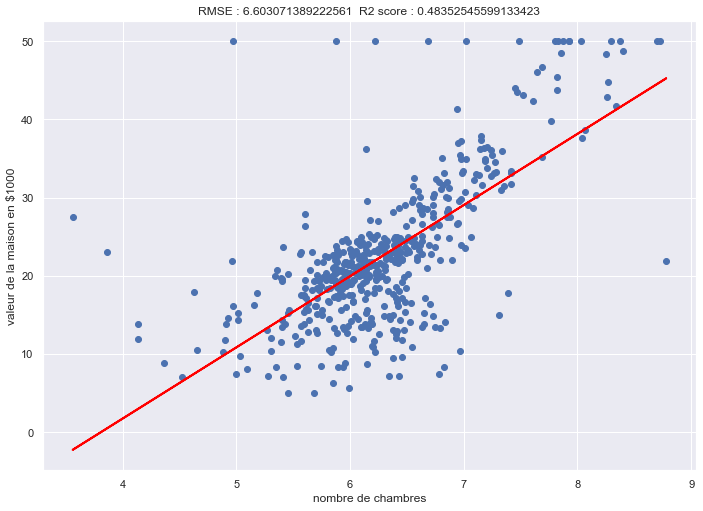

In [14]:
# Illustration du model
plt.scatter(feature,target)
plt.plot(feature, y_pred , color = 'red', linewidth = 2)
plt.ylabel('valeur de la maison en $1000')
plt.xlabel('nombre de chambres')
plt.title('RMSE : {} '.format(rmse) + ' R2 score : {}'.format(r2))
plt.show()